# Other

The other functionalities of Fits object is listed here.
## save_as

As previously mentioned, most methods in the `Fits` class return a new `Fits` object. If an output path is not specified, a temporary file is created, which will be deleted when the `__del__` method is executed. The `save_as` method allows you to save a temporary file or create a copy of an existing FITS file.


In [2]:
from myraflib import Fits
from astropy.coordinates import SkyCoord

fits = Fits.sample()
fits

Fits(@: '129871570943808', path:'/tmp/myraf_0zywvpof.fits')

In [3]:
saved_fits = fits.save_as("/tmp/myraf_we_saved_it.fits", override=True)
saved_fits

Fits(@: '129873795350288', path:'/tmp/myraf_we_saved_it.fits')

Here’s a refined version for the documentation:

## cosmic_clean
This method uses the `cosmicray_lacosmic` algorithm to remove cosmic ray artifacts from digital images.


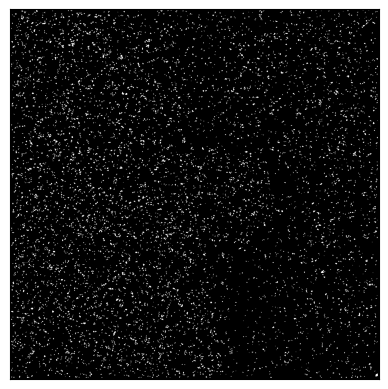

In [4]:
cleaned_fits = fits.cosmic_clean()
residue = fits - cleaned_fits
residue.show()

## imstat
returns digital image's statistics

In [5]:
fits.imstat()

,npix,mean,stddev,min,max
image,,,,,
/tmp/myraf_0zywvpof.fits,795663,9831.481676,3032.392754,3759.0,22918.0


## pixel_to_sky

Returns a `SkyCoord` object for the corresponding pixel, provided that WCS (World Coordinate System) data is available.

In [6]:
sky = fits.pixels_to_skys(10, 10)
sky.sky.iloc[0]

<SkyCoord (ICRS): (ra, dec) in deg
    (85.39691915, -2.58041503)>

## sky_to_pixel

Returns the pixel coordinates corresponding to the given `SkyCoord` object, provided that WCS (World Coordinate System) data is available.

In [7]:
sky = SkyCoord(85.39691915, -2.58041503, unit="degree")

pixel = fits.skys_to_pixels(sky)
pixel

,sky,xcentroid,ycentroid
image,,,
/tmp/myraf_0zywvpof.fits,"<SkyCoord (ICRS): (ra, dec) in deg\n (85.39...",9.999991,10.000009
